In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 그래프 그리기

In [2]:
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
weights = [[60], [65], [72.3], [75], [80]]

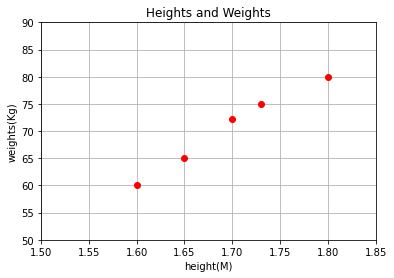

In [3]:
plt.title('Heights and Weights')
plt.xlabel('height(M)')
plt.ylabel('weights(Kg)')
plt.plot(heights, weights, 'ro')  # ro=red dot 
plt.axis([1.5, 1.85, 50, 90])  # x, y axis 범위를 지정
plt.grid(True)

## 선형회귀 모델 만들기 및 예측하기

In [4]:
from sklearn.linear_model import LinearRegression 

In [5]:
model=LinearRegression()  # 모델을 생성하고
model.fit(X=heights, y=weights)  # 해당 모델에 값 입력 (heights를 넣어서 weights를 학습하는 모델)

LinearRegression()

In [6]:
model.predict([[1.75]])

array([[76.03876501]])

In [7]:
w1, w2 = model.predict([[1.75],[2.5]])  
w1, w2

(array([76.03876501]), array([153.52161235]))

In [8]:
model.predict([[1.2],[2.5],[3.5]])

array([[ 19.21801029],
       [153.52161235],
       [256.83207547]])

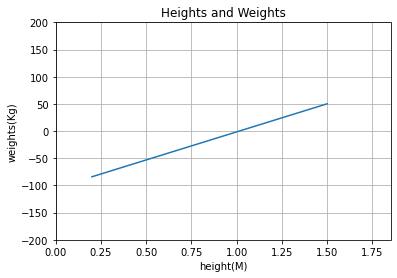

In [9]:
plt.title('Heights and Weights')
plt.xlabel('height(M)')
plt.ylabel('weights(Kg)')
plt.axis([0, 1.85, -200, 200])  # x, y axis 범위를 지정
plt.grid(True)

unknowns=[[0.2],[0.8],[1.5]]
plt.plot(unknowns, model.predict(unknowns))

In [10]:
model.coef_  # 선형회귀선의 기울기

array([[103.31046312]])

In [11]:
# RSS (Regression sum of squares)
RSS = np.sum((weights - model.predict(heights))**2)  # weight: 실제 값, model.predict: 예측 값
print('RSS: %.2f' % RSS)  # 출력을 소수점 2째자리까지 해주는 

RSS: 5.34


In [12]:
# 실제 값 라벨이 있는 경우 R2를 구할 수도 있다.

heights_test = [[1.58], [1.62], [1.69], [1.76], [1.82]]
weights_test = [[58], [63], [72], [73], [85]]

R2 = model.score(heights_test, weights_test)
print('R2: %.2f' % R2)

R2: 0.94


## 모델 저장하기

In [13]:
import pickle 
filename = 'HeightAndWeights_model.sav'
pickle.dump(model, open(filename, 'wb'))  # dump=저장, wb=write binary 

In [14]:
loaded_model = pickle.load(open(filename, 'rb')) # load=불러오기, rb=read binary

In [15]:
result = loaded_model.score(heights_test, weights_test)
result

0.9428592885995254